In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,f1_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA


import os
os.chdir('G:/tableau_data_set')

In [35]:
data=pd.read_csv('global air pollution dataset.csv')
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [8]:
data_selected=data.iloc[:,[2,4,6,8]]

([<matplotlib.axis.YTick at 0x2a5a630bf70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

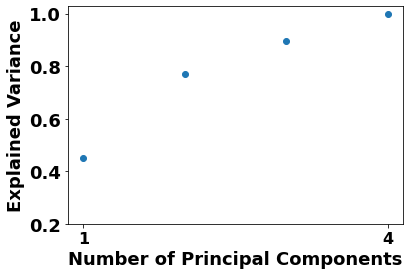

In [16]:
standard_scaler=StandardScaler()
data_scaled_selected=standard_scaler.fit_transform(data_selected)
pca = PCA()

principalComponents = pca.fit_transform(data_scaled_selected)
PCA_VARS=pca.explained_variance_ratio_
x=np.asarray(range(1,len(PCA_VARS)+1))

plt.scatter(x,np.cumsum(PCA_VARS))
plt.xticks(np.asarray(range(1,len(PCA_VARS)+1,3)),fontsize=16,fontweight='bold')
plt.ylabel('Explained Variance',fontsize=18,fontweight='bold')
plt.xlabel('Number of Principal Components',fontsize=18,fontweight='bold')
plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=18,fontweight='bold')


In [21]:
pca3 = PCA(n_components=3)
principalComponents_3=pca3.fit_transform(data_scaled_selected)
PCA_VARS3=pca3.explained_variance_ratio_
scores_3=pca3.transform(data_scaled_selected)
print('Explained variance with 7 principal components:',100*np.sum(PCA_VARS3),'%')
#print('Explained variance with two principal components:',100*np.sum(PCA_VARS),'%')
loadings = pd.DataFrame(pca3.components_.T, columns=['PC1', 'PC2','PC3'], index=data_selected.columns)


Explained variance with 7 principal components: 89.47055081698025 %


Text(0.5, 0, 'Number of Clusters')

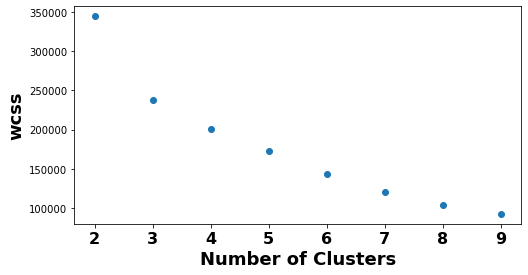

In [28]:
wcss=[]

for i in range(2,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(principalComponents_3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,4))
plt.scatter(range(2,10),wcss)
# plt.yticks([10000,30000,50000],fontsize=16,fontweight='bold')
plt.xticks(range(2,10),fontsize=16,fontweight='bold')
plt.ylabel('wcss',fontsize=18,fontweight='bold')
plt.xlabel('Number of Clusters',fontsize=18,fontweight='bold')

In [31]:
clrs={0:'blue',1:'red',2:'black',3:'green',4:'yellow',5:'pink',6:'purple',7:'grey',8:'magenta',9:'yellowgreen',10:'cyan'}
kmeans_best=KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans_best.fit(principalComponents_3)
labels=kmeans_best.labels_
clrs1=[]
for i in labels:
    clrs1.append(clrs[i])
    

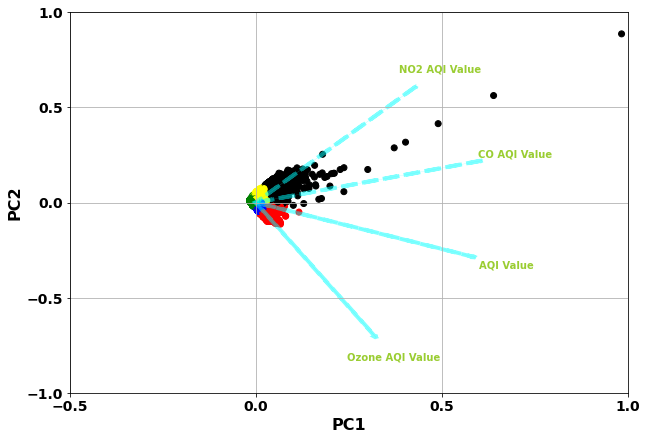

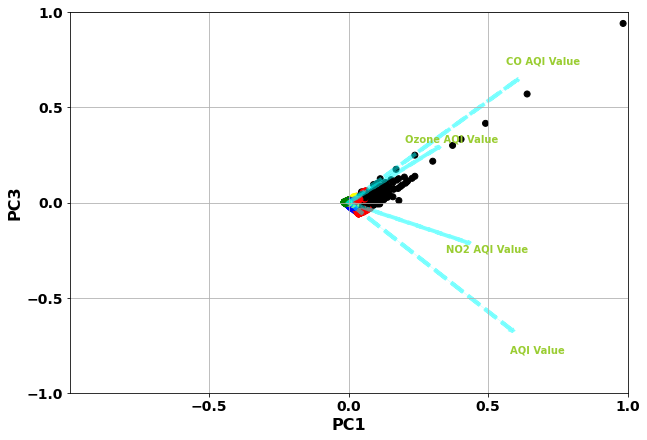

In [61]:
from numpy.linalg import norm
def myplot(score,coeff,pcs,xlim,ylim,colors,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c =colors )
    for i in range(n):
        l1=norm(np.array([coeff[i,0], coeff[i,1]]))
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'cyan',linestyle='--',linewidth=4,alpha = 0.5)
        if l1>0.2:
            if labels is None:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'yellowgreen', ha = 'center', va = 'center',fontweight='bold')
            else:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'yellowgreen', ha = 'center', va = 'center',fontweight='bold')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("PC{}".format(pcs[0]),fontweight='bold',fontsize=16)
    plt.ylabel("PC{}".format(pcs[1]),fontweight='bold',fontsize=16)
    plt.xticks([-0.5,0,0.5,1],fontweight='bold',fontsize=14)
    plt.yticks([-1,-0.5,0,0.5,1],fontweight='bold',fontsize=14)

    plt.grid()
#pca6_addedColors=principalComponents_6['color']
#Call the function. Use only the 2 PCs.
plt.figure(figsize=(10,7))
myplot(principalComponents_3[:,[0,1]],loadings.iloc[:,[0,1]].values,[1,2],[-0.5,1],[-0.5,1],clrs1,labels=data_selected.columns)

plt.show()

plt.figure(figsize=(10,7))
myplot(principalComponents_3[:,[0,2]],loadings.iloc[:,[0,2]].values,[1,3],[-1,1],[-1,1],clrs1,labels=data_selected.columns)
plt.show()

# plt.figure(figsize=(10,7))
# myplot(principalComponents_3[:,[0,5]],loadings.iloc[:,[0,5]].values,[1,6],[-.5,1],[-1,1],clrs1,labels=col_names)
# plt.show()
# plt.figure(figsize=(10,7))
# myplot(principalComponents_7[:,[0,6]],loadings.iloc[:,[0,6]].values,[1,7],[-.5,1],[-1,1],clrs1,labels=col_names)
# plt.show()

In [55]:
def scatter_text(x, y, text_column, data, title, xlabel, ylabel):
    """Scatter plot with country codes on the x y coordinates
       Based on this answer: https://stackoverflow.com/a/54789170/2641825"""
    # Create the scatter plot
    p1 = sns.scatterplot(x, y, data=data, size = 8, legend=False)
    # Add text besides each point
    for line in range(0,data.shape[0]):
         p1.text(data[x][line]+0.01, data[y][line], 
                 data[text_column][line], horizontalalignment='left', 
                 size='medium', color='black', weight='semibold')
    # Set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return p1

In [53]:
data_everything = pd.DataFrame(principalComponents_3, columns=['t1', 't2','t3'])
data_everything['City']=data.City
data_everything


,t1,t2,t3,City
0,-0.575884,-0.316131,0.258777,Praskoveya
1,-0.946031,0.615558,0.023614,Presidente Dutra
2,-0.219436,-0.232016,0.027611,Priolo Gargallo
3,-0.776364,-0.180048,0.442502,Przasnysz
4,-1.369802,0.056000,0.109166,Punaauia
...,...,...,...,...
140794,0.121665,0.916139,-0.237481,Renton
140795,2.817948,-3.506489,0.613882,Rewari
140796,-1.115228,0.381235,-0.235412,Rio Negrinho
140797,-0.505807,-0.135176,0.163561,Riom


G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Scatter Plot'}, xlabel='PC1', ylabel='PC2'>

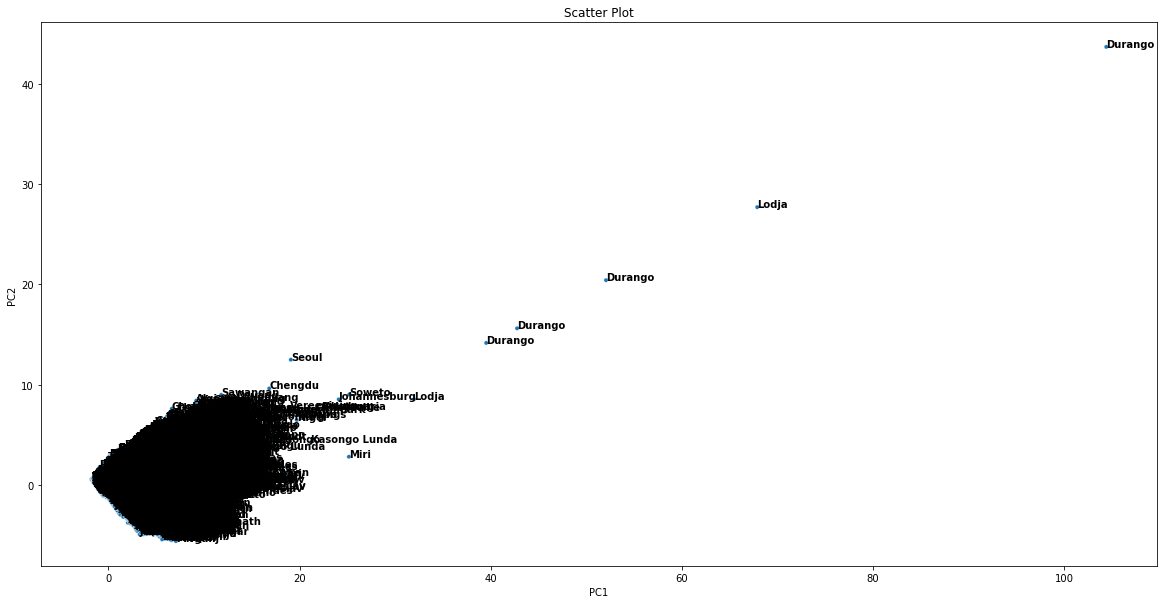

In [62]:
plt.figure(figsize=(20,10))
scatter_text('t1', 't2', 'City',
             data = data_everything, 
             title = 'Scatter Plot', 
             xlabel = 'PC1',
             ylabel = 'PC2')